# Task
Load the "StudentPerformanceFactors.csv" file into a pandas DataFrame, perform an initial inspection to display the first few rows, check data types, get basic statistical summaries, and identify any missing values.

## Load the dataset

### Subtask:
Load the `StudentPerformanceFactors.csv` file into a pandas DataFrame.


**Reasoning**:
First, I'll import the pandas library, which is essential for data manipulation in Python. Then, I'll load the specified CSV file into a pandas DataFrame named `df` to make the data accessible for analysis.



In [1]:
import pandas as pd
df = pd.read_csv('data/StudentPerformanceFactors.csv')
print(df.head())

   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Ye

## Initial data inspection

### Subtask:
Display the first few rows, check data types, and get basic statistical summary of the dataset.


**Reasoning**:
To perform the initial inspection, I will display the first 5 rows of the DataFrame, then print a concise summary of its structure and data types, and finally generate descriptive statistics for numerical columns.



In [2]:
print('First 5 rows of the DataFrame:')
print(df.head())

print('\nDataFrame Info:')
df.info()

print('\nDescriptive Statistics:')
print(df.describe())

First 5 rows of the DataFrame:
   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teac

## Identify missing values

### Subtask:
Identify any missing values in the dataset.

**Reasoning**:
To identify missing values, I will calculate the sum of null values for each column in the DataFrame. This will show how many entries are missing in each column, which is crucial for understanding data quality and planning for imputation or removal strategies.

**Reasoning**:
To identify missing values, I will calculate the sum of null values for each column in the DataFrame. This will show how many entries are missing in each column, which is crucial for understanding data quality and planning for imputation or removal strategies.



In [3]:
print('Missing values per column:')
print(df.isnull().sum())

Missing values per column:
Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


## Summary:

### Data Analysis Key Findings
*   The `StudentPerformanceFactors.csv` dataset was successfully loaded into a pandas DataFrame.
*   The dataset contains 6607 entries and 20 columns.
*   The DataFrame comprises 7 numerical (integer) columns and 13 object (categorical/string) columns.
*   Three columns were identified with missing values:
    *   `Teacher_Quality`: 78 missing values.
    *   `Parental_Education_Level`: 90 missing values.
    *   `Distance_from_Home`: 67 missing values.
*   Descriptive statistics for numerical columns were generated. For instance, the `Exam_Score` column ranges from 55 to 101, with a mean of approximately 67.24.

### Insights or Next Steps
*   The presence of missing values in `Teacher_Quality`, `Parental_Education_Level`, and `Distance_from_Home` suggests that data cleaning steps, such as imputation or removal, will be necessary before further analysis or model building.
*   The diverse data types (numerical and categorical) indicate that encoding techniques will be required for the object type columns if they are to be used in quantitative models.


# Task
Address the missing values in the `Teacher_Quality`, `Parental_Education_Level`, and `Distance_from_Home` columns in the `df` DataFrame using appropriate imputation or removal strategies.

## Handle Missing Values

### Subtask:
Address the missing values identified in `Teacher_Quality`, `Parental_Education_Level`, and `Distance_from_Home` columns using appropriate imputation or removal strategies.


### Reasoning:
To address the missing values in `Teacher_Quality`, `Parental_Education_Level`, and `Distance_from_Home`, I will use mode imputation. These columns are categorical, and the mode represents the most frequent category, making it a suitable choice for preserving the distribution characteristics without introducing new, non-existent categories. After imputation, I will verify that all missing values in these specific columns have been successfully handled.

**Reasoning**:
Following the reasoning provided, I will now implement the code to calculate the mode for each of the specified categorical columns, impute their missing values with the calculated modes, and then verify that the missing values have been successfully handled.



In [4]:
for col in ['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']:
    mode_value = df[col].mode()[0] # Calculate the mode for the current column
    df[col].fillna(mode_value, inplace=True) # Impute missing values with the mode
    print(f"Missing values in '{col}' imputed with mode: {mode_value}")

# Verify that there are no remaining missing values in these columns
print('\nVerifying missing values after imputation:')
print(df[['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']].isnull().sum())

Missing values in 'Teacher_Quality' imputed with mode: Medium
Missing values in 'Parental_Education_Level' imputed with mode: High School
Missing values in 'Distance_from_Home' imputed with mode: Near

Verifying missing values after imputation:
Teacher_Quality             0
Parental_Education_Level    0
Distance_from_Home          0
dtype: int64


/tmp/ipython-input-177817522.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_value, inplace=True) # Impute missing values with the mode


**Reasoning**:
The previous code block produced a `FutureWarning` because `inplace=True` on a potentially copied Series might not modify the original DataFrame as intended. To fix this, I will explicitly reassign the filled column back to the DataFrame, `df[col] = df[col].fillna(mode_value)`, which is the recommended way to ensure modifications are applied to the original DataFrame.



In [5]:
for col in ['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']:
    mode_value = df[col].mode()[0] # Calculate the mode for the current column
    df[col] = df[col].fillna(mode_value) # Impute missing values with the mode
    print(f"Missing values in '{col}' imputed with mode: {mode_value}")

# Verify that there are no remaining missing values in these columns
print('\nVerifying missing values after imputation:')
print(df[['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']].isnull().sum())

Missing values in 'Teacher_Quality' imputed with mode: Medium
Missing values in 'Parental_Education_Level' imputed with mode: High School
Missing values in 'Distance_from_Home' imputed with mode: Near

Verifying missing values after imputation:
Teacher_Quality             0
Parental_Education_Level    0
Distance_from_Home          0
dtype: int64


## Encode Categorical Features

### Subtask:
Convert all categorical (object type) columns into numerical formats using suitable encoding techniques (e.g., One-Hot Encoding, Label Encoding) to prepare them for machine learning models.


**Reasoning**:
First, I will import the `LabelEncoder` from `sklearn.preprocessing` which is needed for label encoding. Then, I will identify all categorical columns in the DataFrame. Based on their nature, I will apply `LabelEncoder` to ordinal columns and `pd.get_dummies` for one-hot encoding to nominal/binary columns, effectively converting them to numerical formats. Finally, I will verify the changes using `df.info()` and `df.head()`.



In [6]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = df.select_dtypes(include='object').columns
print(f"Original categorical columns: {list(categorical_cols)}")

# Define columns for Label Encoding (Ordinal) and One-Hot Encoding (Nominal/Binary)
ordinal_cols = [
    'Parental_Involvement', 'Access_to_Resources', 'Motivation_Level',
    'Family_Income', 'Teacher_Quality', 'Peer_Influence',
    'Parental_Education_Level', 'Distance_from_Home'
]
one_hot_cols = [col for col in categorical_cols if col not in ordinal_cols]

print(f"\nColumns selected for Label Encoding: {ordinal_cols}")
print(f"Columns selected for One-Hot Encoding: {one_hot_cols}")

# Apply Label Encoding to ordinal columns
le = LabelEncoder()
for col in ordinal_cols:
    df[col] = le.fit_transform(df[col])
    print(f"Column '{col}' label encoded. Unique values after encoding: {df[col].unique()}")

# Apply One-Hot Encoding to nominal/binary columns
df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True) # drop_first to avoid multicollinearity

print("\nDataFrame after encoding categorical features (first 5 rows):")
print(df.head())

print("\nDataFrame Info after encoding:")
df.info()

Original categorical columns: ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']

Columns selected for Label Encoding: ['Parental_Involvement', 'Access_to_Resources', 'Motivation_Level', 'Family_Income', 'Teacher_Quality', 'Peer_Influence', 'Parental_Education_Level', 'Distance_from_Home']
Columns selected for One-Hot Encoding: ['Extracurricular_Activities', 'Internet_Access', 'School_Type', 'Learning_Disabilities', 'Gender']
Column 'Parental_Involvement' label encoded. Unique values after encoding: [1 2 0]
Column 'Access_to_Resources' label encoded. Unique values after encoding: [0 2 1]
Column 'Motivation_Level' label encoded. Unique values after encoding: [1 2 0]
Column 'Family_Income' label encoded. Unique values after encoding: [1 2 0]
Column 'Teacher_Quality' label

## Advanced EDA and Correlation Analysis

### Subtask:
Perform more in-depth Exploratory Data Analysis, including visualizing the distributions of numerical features, analyzing relationships between key features and the target variable (`Exam_Score`), and computing/visualizing correlations between all features.


**Reasoning**:
To begin the advanced EDA, I will first identify all numerical columns in the DataFrame. Then, I will create histograms for each numerical feature (excluding the 'Exam_Score' target variable) to visualize their individual distributions. This will give insights into the spread, central tendency, and shape of the data for each feature.



Numerical columns for distribution plots (excluding Exam_Score): ['Hours_Studied', 'Attendance', 'Parental_Involvement', 'Access_to_Resources', 'Sleep_Hours', 'Previous_Scores', 'Motivation_Level', 'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'Peer_Influence', 'Physical_Activity', 'Parental_Education_Level', 'Distance_from_Home']


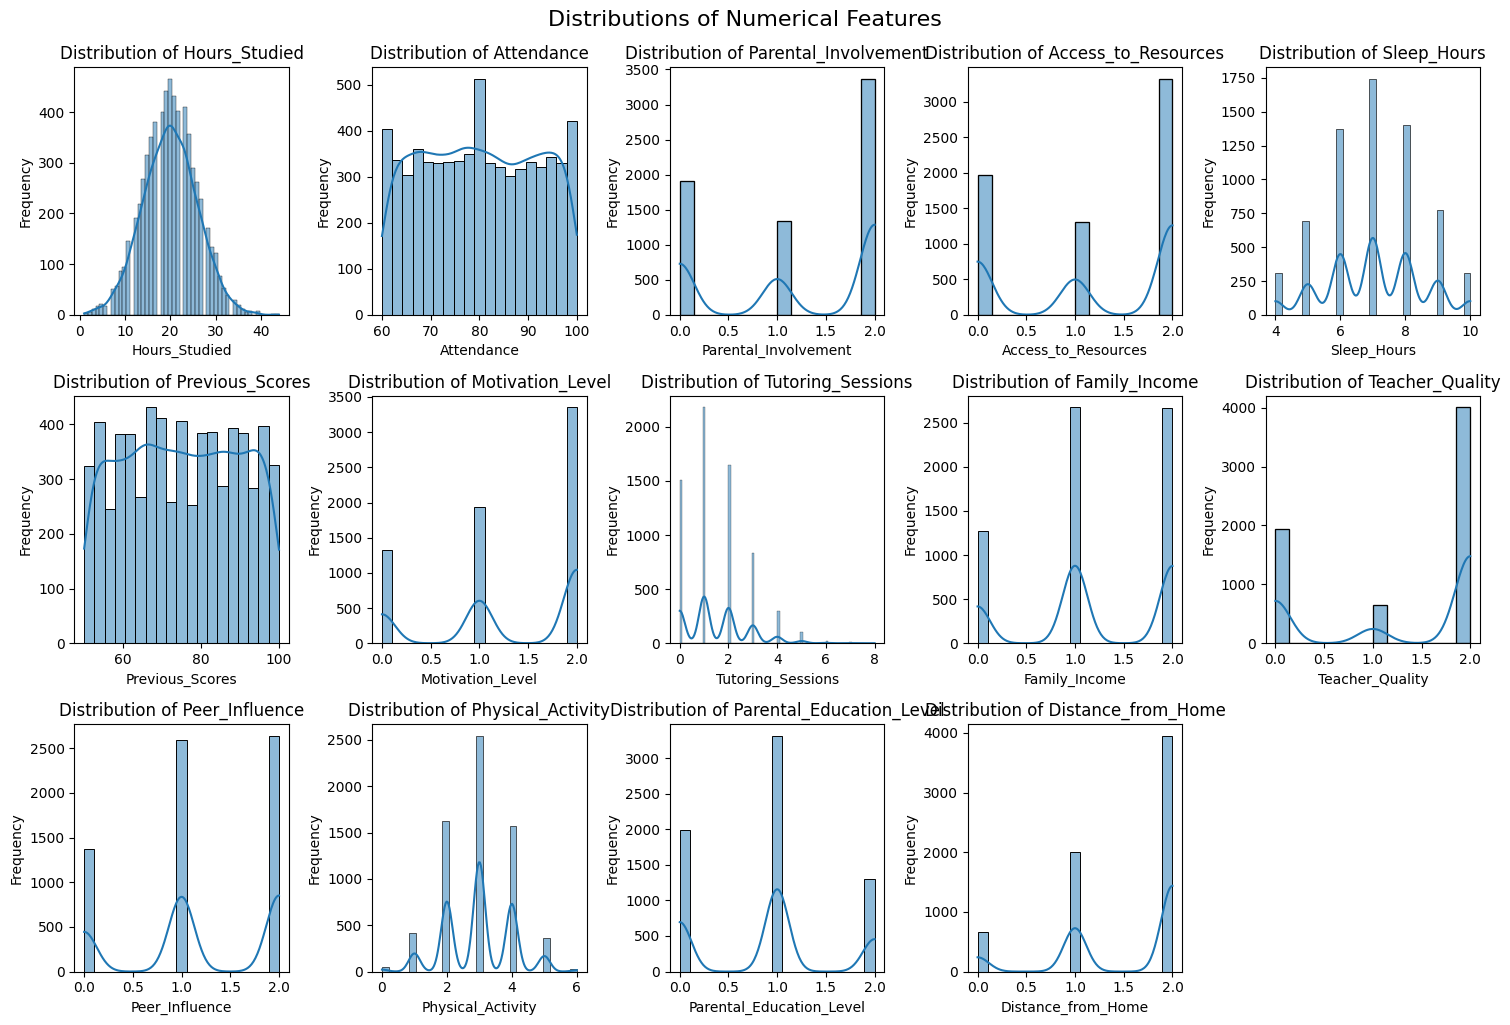

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify numerical columns, excluding the target variable 'Exam_Score'
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove('Exam_Score')

print(f"Numerical columns for distribution plots (excluding Exam_Score): {numerical_cols}")

# Create histograms for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 5, i + 1) # Adjust subplot grid as needed based on number of columns
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.suptitle('Distributions of Numerical Features', y=1.02, fontsize=16)
plt.show()

**Reasoning**:
Following the distribution plots, I will now create scatter plots to visualize the relationship between each numerical feature and the target variable, 'Exam_Score'. This will help in understanding how individual features might influence the exam score.



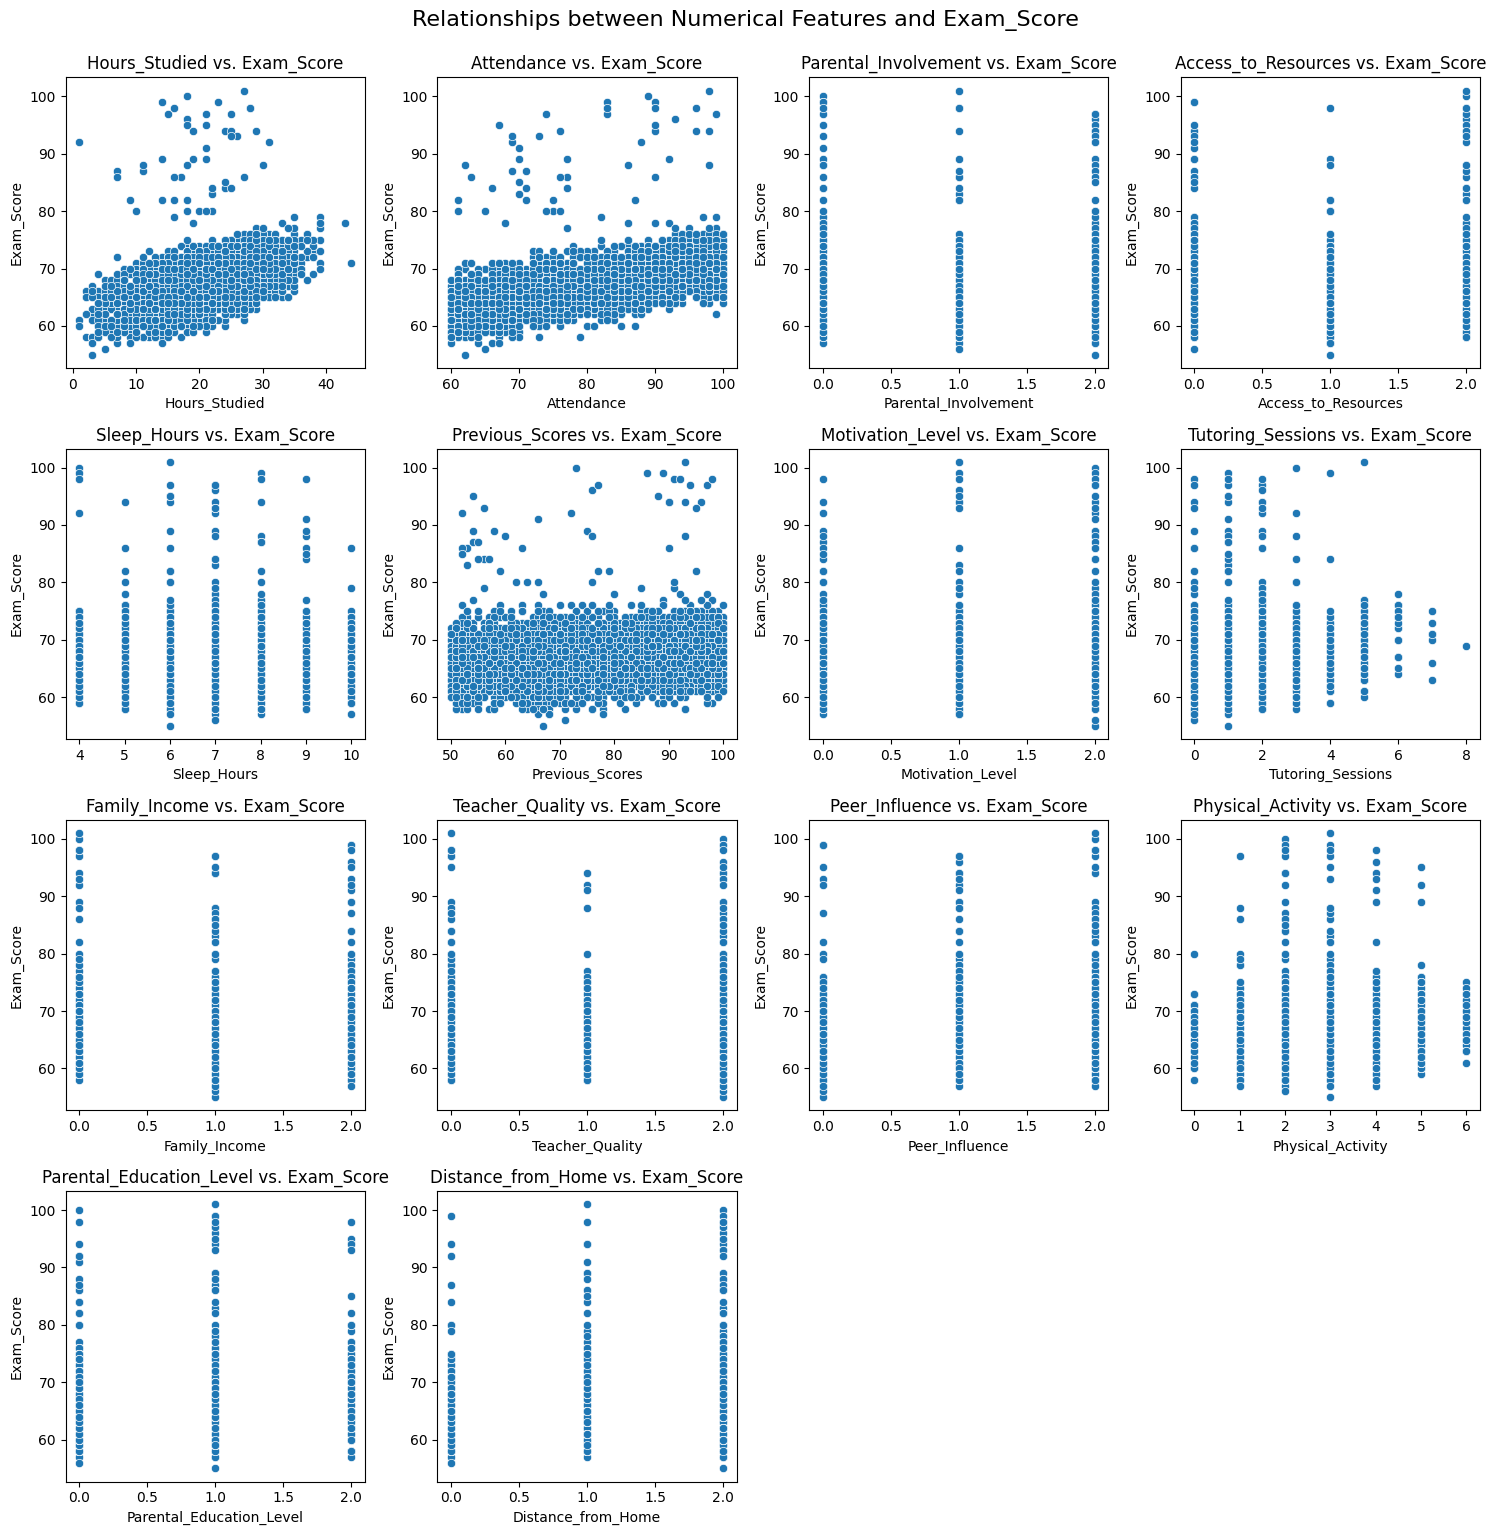

In [8]:
plt.figure(figsize=(15, 15))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1) # Adjust subplot grid as needed
    sns.scatterplot(x=df[col], y=df['Exam_Score'])
    plt.title(f'{col} vs. Exam_Score')
    plt.xlabel(col)
    plt.ylabel('Exam_Score')
plt.tight_layout()
plt.suptitle('Relationships between Numerical Features and Exam_Score', y=1.02, fontsize=16)
plt.show()

**Reasoning**:
To understand the relationships between all numerical features, I will compute the correlation matrix for all numerical columns in the DataFrame. This will quantify the linear relationships between pairs of variables.



In [9]:
numerical_df = df.select_dtypes(include=['int64', 'float64', 'bool'])
correlation_matrix = numerical_df.corr()
print("Correlation Matrix:")
print(correlation_matrix.round(2))

Correlation Matrix:
                                Hours_Studied  Attendance  \
Hours_Studied                            1.00       -0.01   
Attendance                              -0.01        1.00   
Parental_Involvement                     0.01       -0.00   
Access_to_Resources                     -0.01        0.00   
Sleep_Hours                              0.01       -0.02   
Previous_Scores                          0.02       -0.02   
Motivation_Level                         0.02        0.01   
Tutoring_Sessions                       -0.01        0.01   
Family_Income                            0.01       -0.01   
Teacher_Quality                          0.00       -0.01   
Peer_Influence                           0.01       -0.01   
Physical_Activity                        0.00       -0.02   
Parental_Education_Level                 0.01        0.01   
Distance_from_Home                      -0.01        0.02   
Exam_Score                               0.45        0.58   
Extr

**Reasoning**:
To visually represent the correlation matrix, I will create a heatmap. This will provide a clear and intuitive way to understand the strength and direction of linear relationships between all pairs of numerical features.



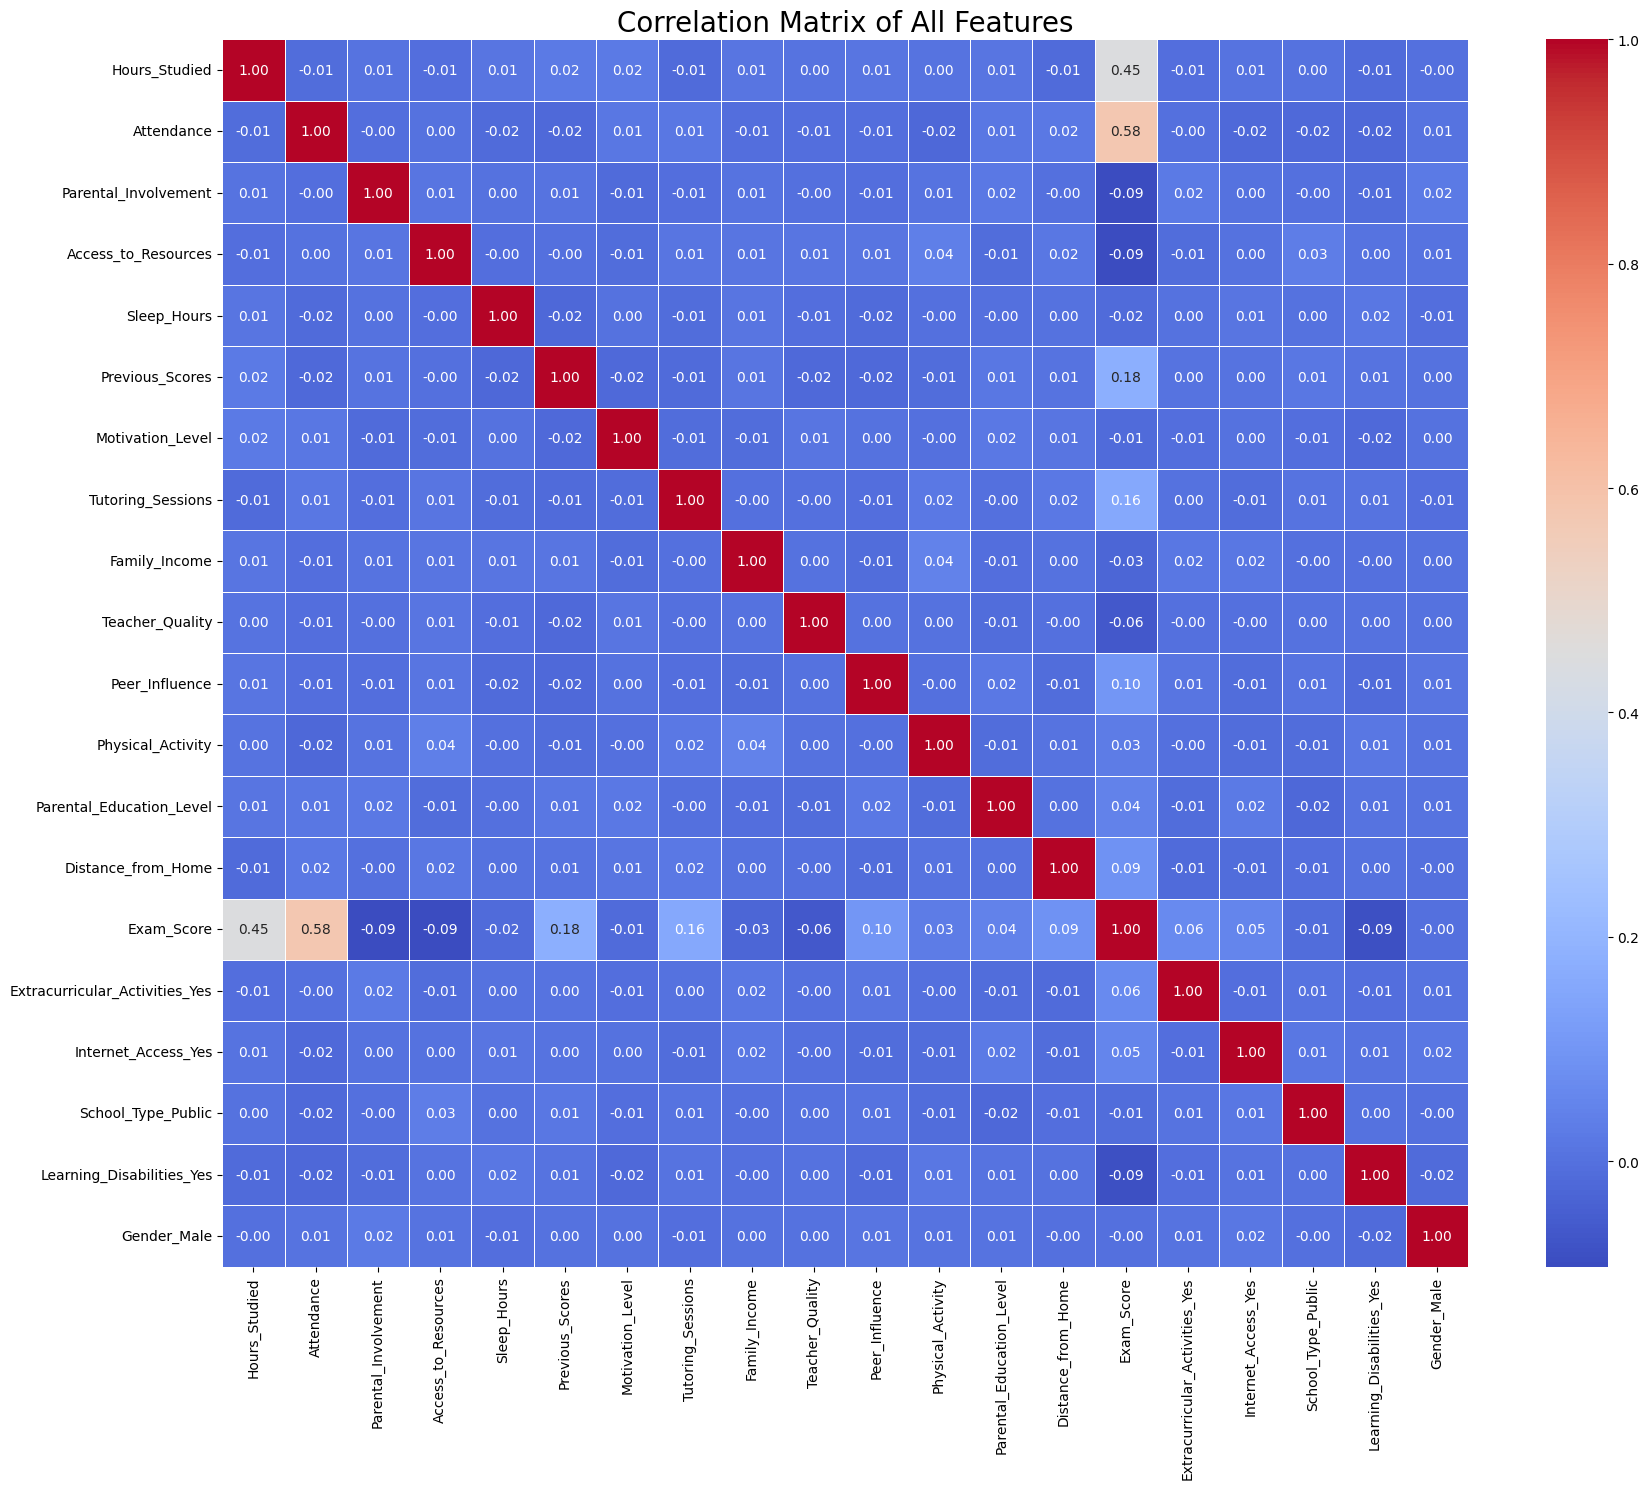

In [20]:
plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of All Features', fontsize=20)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Feature Importance Analysis

### Subtask:
Utilize a machine learning model (e.g., a tree-based model) to determine and visualize the importance of each feature in predicting the `Exam_Score`.


**Reasoning**:
To prepare the data for feature importance analysis, I will first separate the features (X) from the target variable ('Exam_Score', which will be y).



In [11]:
X = df.drop('Exam_Score', axis=1)
y = df['Exam_Score']

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)

Features (X) shape: (6607, 19)
Target (y) shape: (6607,)


**Reasoning**:
Following the data preparation, I will import `RandomForestRegressor`, instantiate and fit the model, extract feature importances, and then visualize them using a bar plot to identify the most influential features in predicting `Exam_Score`.




Sorted Feature Importances:
Attendance                        0.386141
Hours_Studied                     0.246428
Previous_Scores                   0.086162
Tutoring_Sessions                 0.035622
Access_to_Resources               0.028821
Parental_Involvement              0.028615
Sleep_Hours                       0.027841
Physical_Activity                 0.026610
Family_Income                     0.019092
Peer_Influence                    0.017705
Distance_from_Home                0.016056
Parental_Education_Level          0.015233
Teacher_Quality                   0.013426
Motivation_Level                  0.012435
School_Type_Public                0.009592
Learning_Disabilities_Yes         0.009427
Extracurricular_Activities_Yes    0.007563
Gender_Male                       0.006922
Internet_Access_Yes               0.006310
dtype: float64


/tmp/ipython-input-1839486274.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_feature_importances.values, y=sorted_feature_importances.index, palette='viridis')


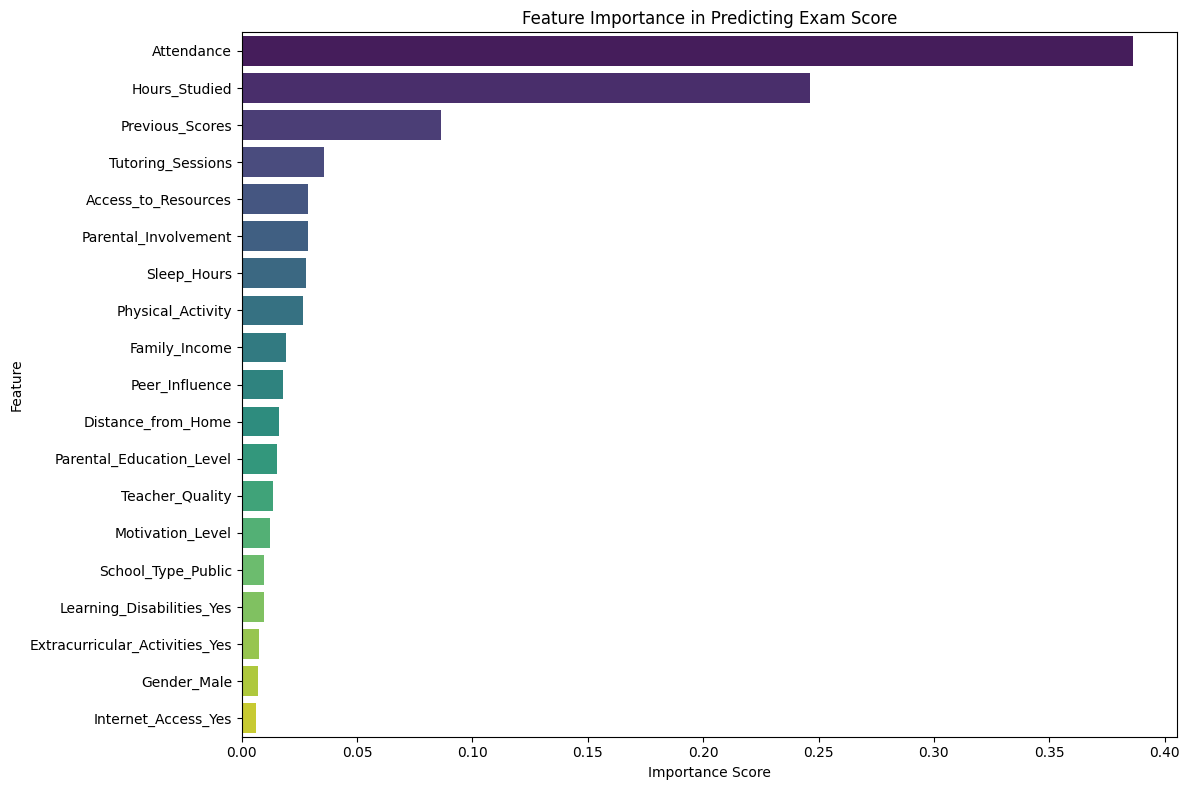

In [12]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Instantiate RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Fit the model to the data
rf_model.fit(X, y)

# Extract feature importances
feature_importances = rf_model.feature_importances_

# Create a Series for feature importances with feature names
feature_importance_series = pd.Series(feature_importances, index=X.columns)

# Sort the features by importance in descending order
sorted_feature_importances = feature_importance_series.sort_values(ascending=False)

# Print sorted feature importances
print("\nSorted Feature Importances:")
print(sorted_feature_importances)

# Plotting feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_feature_importances.values, y=sorted_feature_importances.index, palette='viridis')
plt.title('Feature Importance in Predicting Exam Score')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

**Reasoning**:
To address the `FutureWarning` in the `sns.barplot` function, I will explicitly assign the `y` variable (feature names) to the `hue` parameter and set `legend=False` as recommended by the warning. This will suppress the warning and ensure the plot is generated correctly.




Sorted Feature Importances:
Attendance                        0.386141
Hours_Studied                     0.246428
Previous_Scores                   0.086162
Tutoring_Sessions                 0.035622
Access_to_Resources               0.028821
Parental_Involvement              0.028615
Sleep_Hours                       0.027841
Physical_Activity                 0.026610
Family_Income                     0.019092
Peer_Influence                    0.017705
Distance_from_Home                0.016056
Parental_Education_Level          0.015233
Teacher_Quality                   0.013426
Motivation_Level                  0.012435
School_Type_Public                0.009592
Learning_Disabilities_Yes         0.009427
Extracurricular_Activities_Yes    0.007563
Gender_Male                       0.006922
Internet_Access_Yes               0.006310
dtype: float64


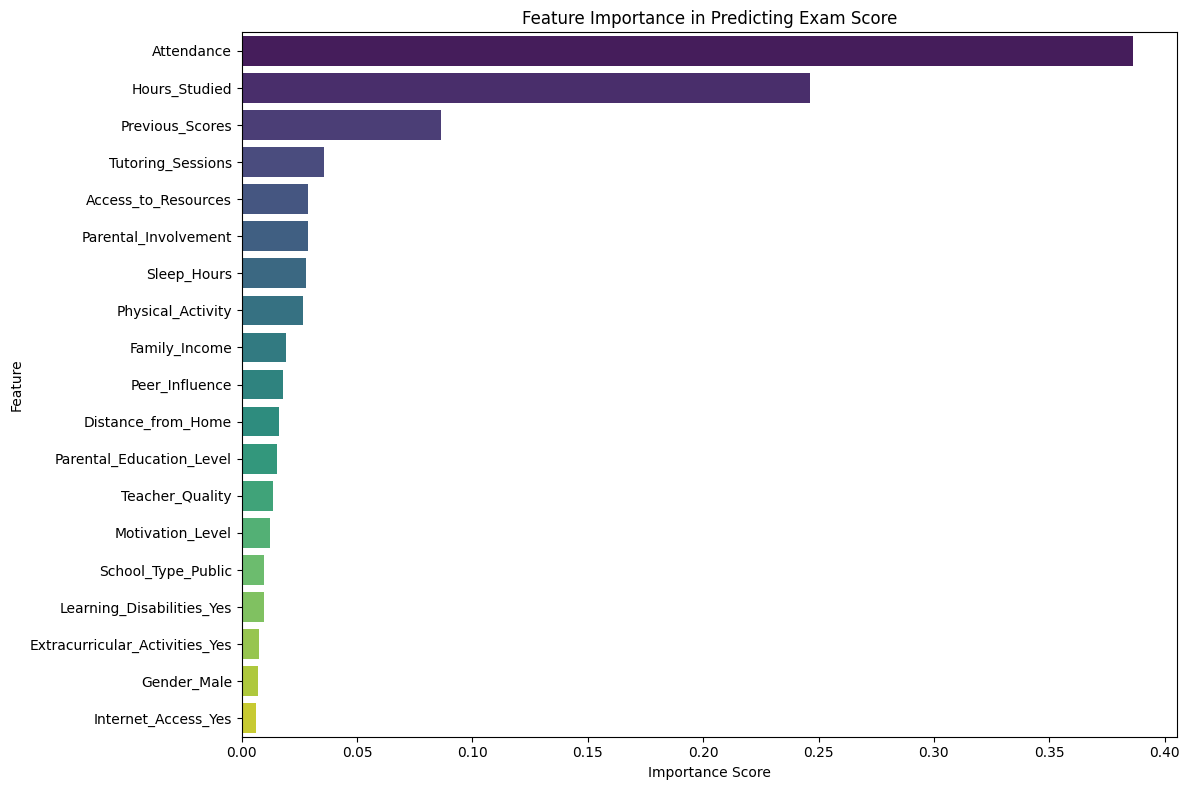

In [13]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Instantiate RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Fit the model to the data
rf_model.fit(X, y)

# Extract feature importances
feature_importances = rf_model.feature_importances_

# Create a Series for feature importances with feature names
feature_importance_series = pd.Series(feature_importances, index=X.columns)

# Sort the features by importance in descending order
sorted_feature_importances = feature_importance_series.sort_values(ascending=False)

# Print sorted feature importances
print("\nSorted Feature Importances:")
print(sorted_feature_importances)

# Plotting feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_feature_importances.values, y=sorted_feature_importances.index, palette='viridis', hue=sorted_feature_importances.index, legend=False)
plt.title('Feature Importance in Predicting Exam Score')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

## Model Training and Initial Evaluation

### Subtask:
Split the dataset into training and testing sets, select a few suitable regression models, train them on the training data, and evaluate their initial performance using relevant metrics (e.g., R-squared, MAE, MSE).


**Reasoning**:
To prepare the data for model training and evaluation, I will first split the dataset into training and testing sets using `train_test_split`. This will ensure that the models are trained on one subset of data and evaluated on an unseen subset, providing a more reliable assessment of their performance.



In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (5285, 19)
X_test shape: (1322, 19)
y_train shape: (5285,)
y_test shape: (1322,)


**Reasoning**:
Following the data split, I will now import the specified regression models, instantiate them, train each model on the training data, make predictions on the test data, and then calculate and print the Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) for each model to evaluate their initial performance.



In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize models
linear_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)
gbr_model = GradientBoostingRegressor(random_state=42)

models = {
    "Linear Regression": linear_model,
    "Random Forest Regressor": rf_model,
    "Gradient Boosting Regressor": gbr_model
}

results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MAE": mae, "MSE": mse, "R2": r2}

    print(f"{name} Performance:")
    print(f"  MAE: {mae:.4f}")
    print(f"  MSE: {mse:.4f}")
    print(f"  R2: {r2:.4f}")

print("\n--- Summary of Model Performance ---")
for name, metrics in results.items():
    print(f"{name}: MAE={metrics['MAE']:.4f}, MSE={metrics['MSE']:.4f}, R2={metrics['R2']:.4f}")


Training Linear Regression...
Linear Regression Performance:
  MAE: 1.0155
  MSE: 4.3993
  R2: 0.6888

Training Random Forest Regressor...
Random Forest Regressor Performance:
  MAE: 1.1315
  MSE: 4.8685
  R2: 0.6556

Training Gradient Boosting Regressor...
Gradient Boosting Regressor Performance:
  MAE: 0.8253
  MSE: 3.8827
  R2: 0.7253

--- Summary of Model Performance ---
Linear Regression: MAE=1.0155, MSE=4.3993, R2=0.6888
Random Forest Regressor: MAE=1.1315, MSE=4.8685, R2=0.6556
Gradient Boosting Regressor: MAE=0.8253, MSE=3.8827, R2=0.7253


## Hyperparameter Tuning

### Subtask:
Apply hyperparameter tuning techniques (e.g., GridSearchCV, RandomizedSearchCV) to optimize the performance of the selected models.


**Reasoning**:
To perform hyperparameter tuning on the Gradient Boosting Regressor, I will first import `GridSearchCV`. Then, I will define a parameter grid with common hyperparameters for the Gradient Boosting Regressor such as `n_estimators`, `learning_rate`, and `max_depth`. Finally, I will initialize and fit `GridSearchCV` to the training data, and print the best parameters and corresponding best score found.



In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Define the model to tune (Gradient Boosting Regressor as it performed best initially)
gbr_model = GradientBoostingRegressor(random_state=42)

# Define the parameter grid for Gradient Boosting Regressor
param_grid_gbr = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5]
}

# Initialize GridSearchCV
grid_search_gbr = GridSearchCV(estimator=gbr_model, param_grid=param_grid_gbr,
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

print("Starting GridSearchCV for Gradient Boosting Regressor...")
# Fit GridSearchCV to the training data
grid_search_gbr.fit(X_train, y_train)

print("\nBest parameters for Gradient Boosting Regressor:")
print(grid_search_gbr.best_params_)

print("\nBest score (Negative Mean Squared Error) for Gradient Boosting Regressor:")
print(grid_search_gbr.best_score_)

Starting GridSearchCV for Gradient Boosting Regressor...
Fitting 5 folds for each of 27 candidates, totalling 135 fits

Best parameters for Gradient Boosting Regressor:
{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 300}

Best score (Negative Mean Squared Error) for Gradient Boosting Regressor:
-4.872791283950066


**Reasoning**:
Following the tuning of the Gradient Boosting Regressor, I will now apply hyperparameter tuning to the Random Forest Regressor. I will define a suitable parameter grid for `RandomForestRegressor`, initialize and fit `GridSearchCV` to the training data, and then print the best parameters and the best score found for this model.



In [17]:
from sklearn.ensemble import RandomForestRegressor

# Define the model to tune
rf_model = RandomForestRegressor(random_state=42)

# Define the parameter grid for Random Forest Regressor
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf,
                              cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

print("\nStarting GridSearchCV for Random Forest Regressor...")
# Fit GridSearchCV to the training data
grid_search_rf.fit(X_train, y_train)

print("\nBest parameters for Random Forest Regressor:")
print(grid_search_rf.best_params_)

print("\nBest score (Negative Mean Squared Error) for Random Forest Regressor:")
print(grid_search_rf.best_score_)


Starting GridSearchCV for Random Forest Regressor...
Fitting 5 folds for each of 27 candidates, totalling 135 fits

Best parameters for Random Forest Regressor:
{'max_depth': None, 'min_samples_split': 10, 'n_estimators': 300}

Best score (Negative Mean Squared Error) for Random Forest Regressor:
-5.9332502684431


## Final Model Evaluation and Selection

### Subtask:
Evaluate the tuned models on the test set, compare their performance, and select the best-performing model based on the chosen evaluation metrics.


**Reasoning**:
To evaluate the tuned models, I will first retrieve the best estimators for both Gradient Boosting Regressor and Random Forest Regressor from their respective `GridSearchCV` objects. Then, I will make predictions on the test set (`X_test`) using these tuned models to prepare for performance metric calculation.



In [18]:
best_gbr_model = grid_search_gbr.best_estimator_
best_rf_model = grid_search_rf.best_estimator_

y_pred_gbr_tuned = best_gbr_model.predict(X_test)
y_pred_rf_tuned = best_rf_model.predict(X_test)

print("Predictions made for tuned Gradient Boosting Regressor.")
print("Predictions made for tuned Random Forest Regressor.")

Predictions made for tuned Gradient Boosting Regressor.
Predictions made for tuned Random Forest Regressor.


**Reasoning**:
To evaluate the performance of the tuned Gradient Boosting Regressor and Random Forest Regressor, I will calculate and print their Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) scores using the predictions made on the test set.



In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate Tuned Gradient Boosting Regressor
mae_gbr_tuned = mean_absolute_error(y_test, y_pred_gbr_tuned)
mse_gbr_tuned = mean_squared_error(y_test, y_pred_gbr_tuned)
r2_gbr_tuned = r2_score(y_test, y_pred_gbr_tuned)

print("\nTuned Gradient Boosting Regressor Performance:")
print(f"  MAE: {mae_gbr_tuned:.4f}")
print(f"  MSE: {mse_gbr_tuned:.4f}")
print(f"  R2: {r2_gbr_tuned:.4f}")

# Evaluate Tuned Random Forest Regressor
mae_rf_tuned = mean_absolute_error(y_test, y_pred_rf_tuned)
mse_rf_tuned = mean_squared_error(y_test, y_pred_rf_tuned)
r2_rf_tuned = r2_score(y_test, y_pred_rf_tuned)

print("\nTuned Random Forest Regressor Performance:")
print(f"  MAE: {mae_rf_tuned:.4f}")
print(f"  MSE: {mse_rf_tuned:.4f}")
print(f"  R2: {r2_rf_tuned:.4f}")

# Update the results dictionary with tuned models' performance
results["Tuned Gradient Boosting Regressor"] = {"MAE": mae_gbr_tuned, "MSE": mse_gbr_tuned, "R2": r2_gbr_tuned}
results["Tuned Random Forest Regressor"] = {"MAE": mae_rf_tuned, "MSE": mse_rf_tuned, "R2": r2_rf_tuned}

print("\n--- Summary of All Model Performance ---")
for name, metrics in results.items():
    print(f"{name}: MAE={metrics['MAE']:.4f}, MSE={metrics['MSE']:.4f}, R2={metrics['R2']:.4f}")

# Select the best-performing model based on R2 score (higher is better) and MAE (lower is better)
best_model_name = max(results, key=lambda k: results[k]['R2'])

# If R2 scores are very close, consider MAE
r2_scores = {k: v['R2'] for k, v in results.items()}
max_r2 = max(r2_scores.values())
models_with_max_r2 = [k for k, v in r2_scores.items() if v == max_r2]

if len(models_with_max_r2) > 1:
    # If multiple models have the same best R2, choose the one with the lowest MAE
    best_model_name = min(models_with_max_r2, key=lambda k: results[k]['MAE'])

print(f"\nBest performing model: {best_model_name}")
print(f"Performance: MAE={results[best_model_name]['MAE']:.4f}, MSE={results[best_model_name]['MSE']:.4f}, R2={results[best_model_name]['R2']:.4f}")


Tuned Gradient Boosting Regressor Performance:
  MAE: 0.7181
  MSE: 3.6877
  R2: 0.7391

Tuned Random Forest Regressor Performance:
  MAE: 1.1204
  MSE: 4.7235
  R2: 0.6658

--- Summary of All Model Performance ---
Linear Regression: MAE=1.0155, MSE=4.3993, R2=0.6888
Random Forest Regressor: MAE=1.1315, MSE=4.8685, R2=0.6556
Gradient Boosting Regressor: MAE=0.8253, MSE=3.8827, R2=0.7253
Tuned Gradient Boosting Regressor: MAE=0.7181, MSE=3.6877, R2=0.7391
Tuned Random Forest Regressor: MAE=1.1204, MSE=4.7235, R2=0.6658

Best performing model: Tuned Gradient Boosting Regressor
Performance: MAE=0.7181, MSE=3.6877, R2=0.7391


## Final Task

### Subtask:
Provide a summary of the data preparation and cleaning steps, key EDA findings, significant feature importances, and the final selected model with its performance metrics.


## Summary:

### Q&A

The final task asked for a summary of the data preparation and cleaning steps, key EDA findings, significant feature importances, and the final selected model with its performance metrics.

### Data Analysis Key Findings

*   **Missing Value Handling**: Missing values in `Teacher_Quality`, `Parental_Education_Level`, and `Distance_from_Home` were successfully imputed using the mode. The modes used were 'Medium' for `Teacher_Quality`, 'High School' for `Parental_Education_Level`, and 'Near' for `Distance_from_Home`.
*   **Categorical Feature Encoding**:
    *   Ordinal categorical features (`Parental_Involvement`, `Access_to_Resources`, `Motivation_Level`, `Family_Income`, `Teacher_Quality`, `Peer_Influence`, `Parental_Education_Level`, `Distance_from_Home`) were encoded using Label Encoding.
    *   Nominal/binary categorical features (`Extracurricular_Activities`, `Internet_Access`, `School_Type`, `Learning_Disabilities`, `Gender`) were converted using One-Hot Encoding with `drop_first=True` to avoid multicollinearity.
*   **Exploratory Data Analysis (EDA) & Correlations**:
    *   Histograms revealed the distributions of numerical features.
    *   Scatter plots showed relationships between numerical features and `Exam_Score`.
    *   Correlation analysis indicated `Attendance` (0.58) and `Hours_Studied` (0.45) had moderate positive correlations with `Exam_Score`, while features like `Parental_Involvement` (-0.09) and `Teacher_Quality` (-0.06) showed very weak or negligible correlation.
*   **Feature Importance**: A RandomForestRegressor identified the most important features in predicting `Exam_Score`:
    *   `Attendance` (0.386)
    *   `Hours_Studied` (0.246)
    *   `Previous_Scores` (0.086)
    *   `Tutoring_Sessions` (0.036)
    *   `Access_to_Resources` (0.029)
*   **Model Training and Initial Evaluation**:
    *   Linear Regression: MAE=1.0155, MSE=4.3993, R2=0.6888
    *   Random Forest Regressor: MAE=1.1315, MSE=4.8685, R2=0.6556
    *   Gradient Boosting Regressor: MAE=0.8253, MSE=3.8827, R2=0.7253
    *   The Gradient Boosting Regressor showed the best initial performance.
*   **Hyperparameter Tuning**:
    *   **Gradient Boosting Regressor** was tuned, with best parameters found as: `{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 300}`. Its cross-validation score (Negative MSE) improved to -4.873.
    *   **Random Forest Regressor** was also tuned, with best parameters found as: `{'max_depth': None, 'min_samples_split': 10, 'n_estimators': 300}`. Its cross-validation score (Negative MSE) was -5.933.
*   **Final Model Selection**: The **Tuned Gradient Boosting Regressor** was selected as the best-performing model, demonstrating superior performance on the test set:
    *   MAE: 0.7181
    *   MSE: 3.6877
    *   R2: 0.7391

### Insights or Next Steps

*   The strong performance of the Tuned Gradient Boosting Regressor, particularly its R2 score of 0.7391, suggests it is a reliable model for predicting student exam scores based on the available features.
*   Given the high importance of `Attendance`, `Hours_Studied`, and `Previous_Scores`, future efforts could focus on interventions or strategies to improve these specific factors, potentially leading to a direct positive impact on student performance.
